In [27]:
import scipy.io as scio
import spectral 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.utils.data as Data
import torch.nn.functional as F
import torch.optim as optim
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False   #这两行需要手动设置
data_path = './数据集/Indian_pines/Indian_pines_corrected.mat'
label_path = './数据集/Indian_pines/Indian_pines_gt.mat'
data = scio.loadmat(data_path)
label = scio.loadmat(label_path)

x = data['indian_pines_corrected']
y = label['indian_pines_gt']
show_x = x.copy()
show_y = y.copy()

x_list = []
for i in range(145):
    for j in range(145):
        temp = (x[i,j,:]-np.min(x[i,j,:]))/(np.max(x[i,j,:])-np.min(x[i,j,:]))
        x_list.append(temp)
x = np.array(x_list)
y = y.reshape((21025,))
print(x.shape, y.shape)

(21025, 200) (21025,)


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
#制作数据集
batch_size=32
train_dataset = Data.TensorDataset(torch.tensor(x_train,dtype=torch.float), torch.tensor(y_train,dtype=torch.float))
train_loader = Data.DataLoader(
    dataset=train_dataset,      # 数据，封装进Data.TensorDataset()类的数据
    batch_size=batch_size,      # 每块的大小
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
)
test_dataset = Data.TensorDataset(torch.tensor(x_test,dtype=torch.float), torch.tensor(y_test,dtype=torch.float))
test_loader = Data.DataLoader(
    dataset=train_dataset,      # 数据，封装进Data.TensorDataset()类的数据
    batch_size=batch_size,      # 每块的大小
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
)

In [32]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(200, 6, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 1)
        self.fc1 = nn.Linear(16*1*1, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 17)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(-1, 16*1*1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('device:{}可用'.format(device))
model = Net().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

device:cuda可用


In [33]:
# Training
model.train()
LOSS_list=[]
for epoch in range(150):
    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        batch_x = batch_x.reshape((len(batch_x),-1,1,1))
        pred = model(batch_x)
        loss = criterion(pred, batch_y.long())
        LOSS_list.append(loss)
        if (epoch + 1) % 10 == 0:
            print('Epoch:', '%04d' % (epoch + 1), 'loss =', '{:.6f}'.format(loss))
        #清除之前的梯度
        optimizer.zero_grad()
        #反向传播计算表梯度
        loss.backward()
        #利用优化器的方法更新参数
        optimizer.step()

Epoch: 0010 loss = 1.524643
Epoch: 0010 loss = 1.192825
Epoch: 0010 loss = 0.898794
Epoch: 0010 loss = 1.531466
Epoch: 0010 loss = 1.646710
Epoch: 0010 loss = 1.042557
Epoch: 0010 loss = 1.231302
Epoch: 0010 loss = 1.154149
Epoch: 0010 loss = 1.112801
Epoch: 0010 loss = 0.858691
Epoch: 0010 loss = 1.580190
Epoch: 0010 loss = 1.155619
Epoch: 0010 loss = 1.065163
Epoch: 0010 loss = 0.977277
Epoch: 0010 loss = 0.935784
Epoch: 0010 loss = 0.913633
Epoch: 0010 loss = 1.076937
Epoch: 0010 loss = 1.522424
Epoch: 0010 loss = 1.370576
Epoch: 0010 loss = 1.447740
Epoch: 0010 loss = 1.074006
Epoch: 0010 loss = 1.170480
Epoch: 0010 loss = 1.592753
Epoch: 0010 loss = 1.288933
Epoch: 0010 loss = 1.253557
Epoch: 0010 loss = 1.190857
Epoch: 0010 loss = 1.258860
Epoch: 0010 loss = 1.684970
Epoch: 0010 loss = 1.119144
Epoch: 0010 loss = 1.152032
Epoch: 0010 loss = 0.790014
Epoch: 0010 loss = 1.104605
Epoch: 0010 loss = 1.395681
Epoch: 0010 loss = 1.369089
Epoch: 0010 loss = 0.918739
Epoch: 0010 loss = 1

Epoch: 0010 loss = 1.126989
Epoch: 0010 loss = 1.229891
Epoch: 0010 loss = 1.117790
Epoch: 0010 loss = 1.287995
Epoch: 0010 loss = 1.082170
Epoch: 0010 loss = 0.997940
Epoch: 0010 loss = 1.252524
Epoch: 0010 loss = 0.987111
Epoch: 0010 loss = 0.930796
Epoch: 0010 loss = 1.049065
Epoch: 0010 loss = 0.985555
Epoch: 0010 loss = 1.082712
Epoch: 0010 loss = 1.232731
Epoch: 0010 loss = 1.205143
Epoch: 0010 loss = 1.311330
Epoch: 0010 loss = 0.764931
Epoch: 0010 loss = 1.386386
Epoch: 0010 loss = 1.171232
Epoch: 0010 loss = 1.288047
Epoch: 0010 loss = 1.168614
Epoch: 0010 loss = 1.139110
Epoch: 0010 loss = 0.966674
Epoch: 0010 loss = 1.019401
Epoch: 0010 loss = 1.355008
Epoch: 0010 loss = 1.050104
Epoch: 0010 loss = 1.101666
Epoch: 0010 loss = 0.867912
Epoch: 0010 loss = 1.224942
Epoch: 0010 loss = 1.640877
Epoch: 0010 loss = 1.259614
Epoch: 0010 loss = 1.507053
Epoch: 0010 loss = 0.763813
Epoch: 0010 loss = 1.108174
Epoch: 0010 loss = 1.113651
Epoch: 0010 loss = 1.135133
Epoch: 0010 loss = 1

Epoch: 0020 loss = 1.369618
Epoch: 0020 loss = 1.132375
Epoch: 0020 loss = 0.790495
Epoch: 0020 loss = 1.085051
Epoch: 0020 loss = 1.343408
Epoch: 0020 loss = 1.089832
Epoch: 0020 loss = 1.003392
Epoch: 0020 loss = 1.259514
Epoch: 0020 loss = 0.982002
Epoch: 0020 loss = 1.541957
Epoch: 0020 loss = 0.915139
Epoch: 0020 loss = 1.211193
Epoch: 0020 loss = 0.937141
Epoch: 0020 loss = 0.893504
Epoch: 0020 loss = 1.137837
Epoch: 0020 loss = 1.232398
Epoch: 0020 loss = 1.051936
Epoch: 0020 loss = 1.033831
Epoch: 0020 loss = 0.932474
Epoch: 0020 loss = 1.262011
Epoch: 0020 loss = 1.265031
Epoch: 0020 loss = 1.074258
Epoch: 0020 loss = 1.144292
Epoch: 0020 loss = 1.295589
Epoch: 0020 loss = 0.942195
Epoch: 0020 loss = 1.080259
Epoch: 0020 loss = 0.971510
Epoch: 0020 loss = 1.072891
Epoch: 0020 loss = 0.785797
Epoch: 0020 loss = 0.933952
Epoch: 0020 loss = 0.800712
Epoch: 0020 loss = 1.218909
Epoch: 0020 loss = 0.927047
Epoch: 0020 loss = 1.053315
Epoch: 0020 loss = 1.073185
Epoch: 0020 loss = 1

Epoch: 0020 loss = 1.165832
Epoch: 0020 loss = 1.073670
Epoch: 0020 loss = 1.244481
Epoch: 0020 loss = 1.124939
Epoch: 0020 loss = 1.241891
Epoch: 0020 loss = 0.763590
Epoch: 0020 loss = 1.471611
Epoch: 0020 loss = 1.320974
Epoch: 0020 loss = 0.841459
Epoch: 0020 loss = 0.918959
Epoch: 0020 loss = 0.870160
Epoch: 0020 loss = 0.907391
Epoch: 0020 loss = 1.150349
Epoch: 0020 loss = 1.039872
Epoch: 0020 loss = 1.142618
Epoch: 0020 loss = 1.074355
Epoch: 0020 loss = 0.992183
Epoch: 0020 loss = 0.942916
Epoch: 0020 loss = 1.400571
Epoch: 0020 loss = 0.969069
Epoch: 0020 loss = 0.917187
Epoch: 0020 loss = 1.002586
Epoch: 0020 loss = 0.799152
Epoch: 0020 loss = 1.008755
Epoch: 0020 loss = 0.996532
Epoch: 0020 loss = 1.478885
Epoch: 0020 loss = 1.174024
Epoch: 0020 loss = 1.188667
Epoch: 0020 loss = 1.163948
Epoch: 0020 loss = 1.368017
Epoch: 0020 loss = 1.047646
Epoch: 0020 loss = 1.240187
Epoch: 0020 loss = 1.067139
Epoch: 0020 loss = 0.789947
Epoch: 0020 loss = 0.791991
Epoch: 0020 loss = 1

Epoch: 0030 loss = 1.046413
Epoch: 0030 loss = 0.982044
Epoch: 0030 loss = 1.121356
Epoch: 0030 loss = 1.141573
Epoch: 0030 loss = 0.720494
Epoch: 0030 loss = 1.405365
Epoch: 0030 loss = 1.186343
Epoch: 0030 loss = 0.786251
Epoch: 0030 loss = 0.947059
Epoch: 0030 loss = 0.768733
Epoch: 0030 loss = 0.943212
Epoch: 0030 loss = 1.293811
Epoch: 0030 loss = 1.556087
Epoch: 0030 loss = 1.320657
Epoch: 0030 loss = 1.079165
Epoch: 0030 loss = 0.637471
Epoch: 0030 loss = 1.004780
Epoch: 0030 loss = 1.176848
Epoch: 0030 loss = 1.015993
Epoch: 0030 loss = 0.800657
Epoch: 0030 loss = 0.972161
Epoch: 0030 loss = 0.935322
Epoch: 0030 loss = 0.817591
Epoch: 0030 loss = 1.012307
Epoch: 0030 loss = 1.028777
Epoch: 0030 loss = 1.122090
Epoch: 0030 loss = 1.190683
Epoch: 0030 loss = 0.820569
Epoch: 0030 loss = 1.260093
Epoch: 0030 loss = 0.545285
Epoch: 0030 loss = 1.273106
Epoch: 0030 loss = 0.988165
Epoch: 0030 loss = 0.864283
Epoch: 0030 loss = 1.126214
Epoch: 0030 loss = 0.939791
Epoch: 0030 loss = 1

Epoch: 0030 loss = 0.982107
Epoch: 0030 loss = 1.105360
Epoch: 0030 loss = 1.087667
Epoch: 0030 loss = 1.131744
Epoch: 0030 loss = 1.091461
Epoch: 0030 loss = 0.813763
Epoch: 0030 loss = 0.984007
Epoch: 0030 loss = 0.903710
Epoch: 0030 loss = 1.028680
Epoch: 0030 loss = 1.158036
Epoch: 0030 loss = 0.989770
Epoch: 0030 loss = 0.998436
Epoch: 0030 loss = 0.919485
Epoch: 0030 loss = 1.130400
Epoch: 0030 loss = 1.208917
Epoch: 0030 loss = 1.045149
Epoch: 0030 loss = 0.950795
Epoch: 0030 loss = 0.673344
Epoch: 0030 loss = 0.669857
Epoch: 0030 loss = 1.124549
Epoch: 0030 loss = 1.528130
Epoch: 0030 loss = 0.895168
Epoch: 0030 loss = 0.979401
Epoch: 0030 loss = 1.090832
Epoch: 0030 loss = 1.293877
Epoch: 0030 loss = 1.477925
Epoch: 0030 loss = 1.023135
Epoch: 0030 loss = 0.983844
Epoch: 0030 loss = 1.237089
Epoch: 0030 loss = 1.259268
Epoch: 0030 loss = 1.290576
Epoch: 0030 loss = 0.983544
Epoch: 0030 loss = 0.798444
Epoch: 0030 loss = 1.454134
Epoch: 0030 loss = 0.824946
Epoch: 0030 loss = 0

Epoch: 0040 loss = 0.963904
Epoch: 0040 loss = 0.727460
Epoch: 0040 loss = 1.118078
Epoch: 0040 loss = 1.365318
Epoch: 0040 loss = 0.951867
Epoch: 0040 loss = 1.394682
Epoch: 0040 loss = 0.973710
Epoch: 0040 loss = 1.188967
Epoch: 0040 loss = 1.035471
Epoch: 0040 loss = 0.553396
Epoch: 0040 loss = 0.968342
Epoch: 0040 loss = 0.786543
Epoch: 0040 loss = 1.051361
Epoch: 0040 loss = 1.160344
Epoch: 0040 loss = 1.037726
Epoch: 0040 loss = 1.158080
Epoch: 0040 loss = 0.874226
Epoch: 0040 loss = 0.943422
Epoch: 0040 loss = 0.699930
Epoch: 0040 loss = 1.012231
Epoch: 0040 loss = 0.774086
Epoch: 0040 loss = 0.976542
Epoch: 0040 loss = 1.202752
Epoch: 0040 loss = 0.831216
Epoch: 0040 loss = 0.761527
Epoch: 0040 loss = 1.084054
Epoch: 0040 loss = 0.745779
Epoch: 0040 loss = 1.059665
Epoch: 0040 loss = 0.814614
Epoch: 0040 loss = 1.028947
Epoch: 0040 loss = 1.231266
Epoch: 0040 loss = 0.905451
Epoch: 0040 loss = 0.975631
Epoch: 0040 loss = 0.653661
Epoch: 0040 loss = 0.609415
Epoch: 0040 loss = 0

Epoch: 0050 loss = 1.008741
Epoch: 0050 loss = 1.169236
Epoch: 0050 loss = 0.938437
Epoch: 0050 loss = 0.702579
Epoch: 0050 loss = 1.360635
Epoch: 0050 loss = 0.872651
Epoch: 0050 loss = 1.305947
Epoch: 0050 loss = 1.196197
Epoch: 0050 loss = 0.598621
Epoch: 0050 loss = 0.868457
Epoch: 0050 loss = 0.997705
Epoch: 0050 loss = 1.136764
Epoch: 0050 loss = 0.699498
Epoch: 0050 loss = 0.840086
Epoch: 0050 loss = 0.835677
Epoch: 0050 loss = 0.953743
Epoch: 0050 loss = 0.965992
Epoch: 0050 loss = 0.810449
Epoch: 0050 loss = 0.602171
Epoch: 0050 loss = 0.943997
Epoch: 0050 loss = 0.757868
Epoch: 0050 loss = 1.054726
Epoch: 0050 loss = 1.004760
Epoch: 0050 loss = 1.156051
Epoch: 0050 loss = 0.800609
Epoch: 0050 loss = 1.447993
Epoch: 0050 loss = 0.992487
Epoch: 0050 loss = 1.064144
Epoch: 0050 loss = 0.972787
Epoch: 0050 loss = 0.870984
Epoch: 0050 loss = 0.612990
Epoch: 0050 loss = 0.780884
Epoch: 0050 loss = 0.967311
Epoch: 0050 loss = 0.946350
Epoch: 0050 loss = 0.816106
Epoch: 0050 loss = 1

Epoch: 0050 loss = 1.070704
Epoch: 0050 loss = 0.858299
Epoch: 0050 loss = 0.637639
Epoch: 0050 loss = 0.741343
Epoch: 0050 loss = 0.804836
Epoch: 0050 loss = 0.805079
Epoch: 0050 loss = 0.801967
Epoch: 0050 loss = 1.130969
Epoch: 0050 loss = 0.862619
Epoch: 0050 loss = 1.229964
Epoch: 0050 loss = 1.157149
Epoch: 0050 loss = 0.744570
Epoch: 0050 loss = 0.776662
Epoch: 0050 loss = 0.675626
Epoch: 0050 loss = 1.211803
Epoch: 0050 loss = 0.804438
Epoch: 0050 loss = 0.769884
Epoch: 0050 loss = 0.879330
Epoch: 0050 loss = 1.124566
Epoch: 0050 loss = 1.272324
Epoch: 0050 loss = 0.744552
Epoch: 0050 loss = 0.925673
Epoch: 0050 loss = 0.893124
Epoch: 0050 loss = 0.799453
Epoch: 0050 loss = 1.194322
Epoch: 0050 loss = 0.946991
Epoch: 0050 loss = 1.217229
Epoch: 0050 loss = 0.852681
Epoch: 0050 loss = 1.235947
Epoch: 0050 loss = 0.917243
Epoch: 0050 loss = 0.898227
Epoch: 0050 loss = 0.951892
Epoch: 0050 loss = 1.113411
Epoch: 0050 loss = 1.079012
Epoch: 0050 loss = 1.145292
Epoch: 0050 loss = 0

Epoch: 0060 loss = 1.040102
Epoch: 0060 loss = 1.105998
Epoch: 0060 loss = 0.867038
Epoch: 0060 loss = 0.884354
Epoch: 0060 loss = 0.879714
Epoch: 0060 loss = 0.954430
Epoch: 0060 loss = 0.912147
Epoch: 0060 loss = 0.916503
Epoch: 0060 loss = 0.791260
Epoch: 0060 loss = 0.927185
Epoch: 0060 loss = 0.913824
Epoch: 0060 loss = 0.953313
Epoch: 0060 loss = 0.959463
Epoch: 0060 loss = 0.877770
Epoch: 0060 loss = 0.869268
Epoch: 0060 loss = 1.209128
Epoch: 0060 loss = 0.897258
Epoch: 0060 loss = 0.748255
Epoch: 0060 loss = 0.874068
Epoch: 0060 loss = 1.109892
Epoch: 0060 loss = 1.073756
Epoch: 0060 loss = 0.722993
Epoch: 0060 loss = 1.044233
Epoch: 0060 loss = 1.029932
Epoch: 0060 loss = 0.712191
Epoch: 0060 loss = 1.114942
Epoch: 0060 loss = 0.830017
Epoch: 0060 loss = 0.877040
Epoch: 0060 loss = 1.128482
Epoch: 0060 loss = 0.755896
Epoch: 0060 loss = 0.875687
Epoch: 0060 loss = 0.868625
Epoch: 0060 loss = 1.012527
Epoch: 0060 loss = 1.126820
Epoch: 0060 loss = 0.856193
Epoch: 0060 loss = 0

Epoch: 0060 loss = 1.295763
Epoch: 0060 loss = 1.004930
Epoch: 0060 loss = 1.085803
Epoch: 0060 loss = 1.013473
Epoch: 0060 loss = 0.778269
Epoch: 0060 loss = 1.364399
Epoch: 0060 loss = 0.976314
Epoch: 0060 loss = 0.933915
Epoch: 0060 loss = 0.861685
Epoch: 0060 loss = 1.181460
Epoch: 0060 loss = 0.873248
Epoch: 0060 loss = 0.940435
Epoch: 0060 loss = 0.839131
Epoch: 0060 loss = 1.042440
Epoch: 0060 loss = 0.935479
Epoch: 0060 loss = 0.740708
Epoch: 0060 loss = 1.092246
Epoch: 0060 loss = 1.213746
Epoch: 0060 loss = 1.020923
Epoch: 0060 loss = 1.085394
Epoch: 0060 loss = 0.843680
Epoch: 0060 loss = 0.672779
Epoch: 0060 loss = 1.032457
Epoch: 0060 loss = 1.030654
Epoch: 0060 loss = 1.022049
Epoch: 0060 loss = 1.090946
Epoch: 0060 loss = 0.776371
Epoch: 0060 loss = 0.762695
Epoch: 0060 loss = 1.168841
Epoch: 0060 loss = 0.814232
Epoch: 0060 loss = 1.036675
Epoch: 0060 loss = 0.923065
Epoch: 0060 loss = 0.852854
Epoch: 0060 loss = 0.858659
Epoch: 0060 loss = 0.885267
Epoch: 0060 loss = 0

Epoch: 0070 loss = 1.017166
Epoch: 0070 loss = 0.793094
Epoch: 0070 loss = 1.099356
Epoch: 0070 loss = 0.943561
Epoch: 0070 loss = 1.254691
Epoch: 0070 loss = 1.033962
Epoch: 0070 loss = 1.145038
Epoch: 0070 loss = 0.889170
Epoch: 0070 loss = 0.757922
Epoch: 0070 loss = 0.954361
Epoch: 0070 loss = 0.737697
Epoch: 0070 loss = 0.823134
Epoch: 0070 loss = 0.758156
Epoch: 0070 loss = 0.565337
Epoch: 0070 loss = 0.536862
Epoch: 0070 loss = 0.744613
Epoch: 0070 loss = 0.654881
Epoch: 0070 loss = 0.809670
Epoch: 0070 loss = 0.712055
Epoch: 0070 loss = 0.984556
Epoch: 0070 loss = 0.913539
Epoch: 0070 loss = 1.050596
Epoch: 0070 loss = 1.071627
Epoch: 0070 loss = 0.877945
Epoch: 0070 loss = 0.648666
Epoch: 0070 loss = 0.864287
Epoch: 0070 loss = 0.924481
Epoch: 0070 loss = 1.075478
Epoch: 0070 loss = 0.979986
Epoch: 0070 loss = 0.757117
Epoch: 0070 loss = 1.097794
Epoch: 0070 loss = 0.923346
Epoch: 0070 loss = 0.897420
Epoch: 0070 loss = 0.763277
Epoch: 0070 loss = 0.971183
Epoch: 0070 loss = 0

Epoch: 0070 loss = 0.664438
Epoch: 0070 loss = 0.866207
Epoch: 0070 loss = 0.928061
Epoch: 0070 loss = 0.752644
Epoch: 0070 loss = 0.744392
Epoch: 0070 loss = 1.132882
Epoch: 0070 loss = 0.575681
Epoch: 0080 loss = 0.850077
Epoch: 0080 loss = 0.996609
Epoch: 0080 loss = 0.645463
Epoch: 0080 loss = 0.798045
Epoch: 0080 loss = 1.034310
Epoch: 0080 loss = 0.877388
Epoch: 0080 loss = 0.866874
Epoch: 0080 loss = 0.673206
Epoch: 0080 loss = 1.105253
Epoch: 0080 loss = 0.687692
Epoch: 0080 loss = 1.024670
Epoch: 0080 loss = 0.755400
Epoch: 0080 loss = 0.727426
Epoch: 0080 loss = 0.661646
Epoch: 0080 loss = 0.864970
Epoch: 0080 loss = 0.787923
Epoch: 0080 loss = 0.809838
Epoch: 0080 loss = 1.014407
Epoch: 0080 loss = 1.097873
Epoch: 0080 loss = 0.883079
Epoch: 0080 loss = 0.764797
Epoch: 0080 loss = 0.723725
Epoch: 0080 loss = 0.839121
Epoch: 0080 loss = 0.921018
Epoch: 0080 loss = 0.895502
Epoch: 0080 loss = 0.761474
Epoch: 0080 loss = 0.819099
Epoch: 0080 loss = 0.653769
Epoch: 0080 loss = 0

Epoch: 0080 loss = 0.984102
Epoch: 0080 loss = 0.884103
Epoch: 0080 loss = 0.778683
Epoch: 0080 loss = 0.878619
Epoch: 0080 loss = 1.129411
Epoch: 0080 loss = 0.667454
Epoch: 0080 loss = 0.722541
Epoch: 0080 loss = 0.776546
Epoch: 0080 loss = 0.659905
Epoch: 0080 loss = 0.825746
Epoch: 0080 loss = 0.667605
Epoch: 0080 loss = 0.941599
Epoch: 0080 loss = 0.730830
Epoch: 0080 loss = 0.799253
Epoch: 0080 loss = 0.797521
Epoch: 0080 loss = 0.785864
Epoch: 0080 loss = 1.002263
Epoch: 0080 loss = 1.024474
Epoch: 0080 loss = 1.090769
Epoch: 0080 loss = 0.852850
Epoch: 0080 loss = 1.114357
Epoch: 0080 loss = 0.961805
Epoch: 0080 loss = 0.847051
Epoch: 0080 loss = 0.923113
Epoch: 0080 loss = 0.782816
Epoch: 0080 loss = 1.011109
Epoch: 0080 loss = 1.032923
Epoch: 0080 loss = 0.936311
Epoch: 0080 loss = 0.887218
Epoch: 0080 loss = 1.097225
Epoch: 0080 loss = 0.587714
Epoch: 0080 loss = 0.664277
Epoch: 0080 loss = 0.979981
Epoch: 0080 loss = 0.721042
Epoch: 0080 loss = 0.655835
Epoch: 0080 loss = 0

Epoch: 0090 loss = 0.613984
Epoch: 0090 loss = 0.674415
Epoch: 0090 loss = 0.803010
Epoch: 0090 loss = 0.775753
Epoch: 0090 loss = 0.688403
Epoch: 0090 loss = 1.086241
Epoch: 0090 loss = 0.725980
Epoch: 0090 loss = 0.979541
Epoch: 0090 loss = 1.065079
Epoch: 0090 loss = 0.847015
Epoch: 0090 loss = 0.951457
Epoch: 0090 loss = 0.779900
Epoch: 0090 loss = 0.593848
Epoch: 0090 loss = 0.779805
Epoch: 0090 loss = 0.672494
Epoch: 0090 loss = 0.702224
Epoch: 0090 loss = 0.722565
Epoch: 0090 loss = 0.791149
Epoch: 0090 loss = 0.854406
Epoch: 0090 loss = 0.681827
Epoch: 0090 loss = 0.965269
Epoch: 0090 loss = 0.808646
Epoch: 0090 loss = 0.885428
Epoch: 0090 loss = 0.932670
Epoch: 0090 loss = 0.830090
Epoch: 0090 loss = 0.762022
Epoch: 0090 loss = 0.882468
Epoch: 0090 loss = 1.168824
Epoch: 0090 loss = 0.889479
Epoch: 0090 loss = 0.778505
Epoch: 0090 loss = 0.888049
Epoch: 0090 loss = 0.669948
Epoch: 0090 loss = 0.630156
Epoch: 0090 loss = 0.682655
Epoch: 0090 loss = 1.235583
Epoch: 0090 loss = 0

Epoch: 0090 loss = 0.869075
Epoch: 0090 loss = 0.584562
Epoch: 0090 loss = 0.846707
Epoch: 0090 loss = 0.536963
Epoch: 0090 loss = 0.780308
Epoch: 0090 loss = 0.717998
Epoch: 0090 loss = 1.078194
Epoch: 0090 loss = 1.091929
Epoch: 0090 loss = 0.550607
Epoch: 0090 loss = 0.664226
Epoch: 0090 loss = 0.773041
Epoch: 0090 loss = 0.614170
Epoch: 0090 loss = 0.828326
Epoch: 0090 loss = 0.794832
Epoch: 0090 loss = 0.713333
Epoch: 0090 loss = 0.584850
Epoch: 0090 loss = 0.686670
Epoch: 0090 loss = 0.475489
Epoch: 0090 loss = 0.931571
Epoch: 0090 loss = 0.676566
Epoch: 0090 loss = 0.721729
Epoch: 0090 loss = 0.969635
Epoch: 0090 loss = 0.800258
Epoch: 0090 loss = 1.174013
Epoch: 0090 loss = 0.663308
Epoch: 0090 loss = 0.898734
Epoch: 0090 loss = 0.824164
Epoch: 0090 loss = 0.573163
Epoch: 0090 loss = 1.309421
Epoch: 0090 loss = 0.691451
Epoch: 0090 loss = 1.066967
Epoch: 0090 loss = 0.636696
Epoch: 0090 loss = 0.837094
Epoch: 0090 loss = 0.684894
Epoch: 0090 loss = 0.924423
Epoch: 0090 loss = 0

Epoch: 0100 loss = 0.848912
Epoch: 0100 loss = 0.665346
Epoch: 0100 loss = 0.724116
Epoch: 0100 loss = 0.527004
Epoch: 0100 loss = 0.873496
Epoch: 0100 loss = 0.959121
Epoch: 0100 loss = 0.747976
Epoch: 0100 loss = 0.751250
Epoch: 0100 loss = 0.824844
Epoch: 0100 loss = 1.131406
Epoch: 0100 loss = 1.046676
Epoch: 0100 loss = 0.829029
Epoch: 0100 loss = 1.046704
Epoch: 0100 loss = 0.714308
Epoch: 0100 loss = 1.037499
Epoch: 0100 loss = 0.814943
Epoch: 0100 loss = 0.652745
Epoch: 0100 loss = 0.721277
Epoch: 0100 loss = 0.956859
Epoch: 0100 loss = 0.705338
Epoch: 0100 loss = 0.755813
Epoch: 0100 loss = 0.796934
Epoch: 0100 loss = 0.624947
Epoch: 0100 loss = 0.627485
Epoch: 0100 loss = 0.781722
Epoch: 0100 loss = 0.775830
Epoch: 0100 loss = 0.879193
Epoch: 0100 loss = 0.804914
Epoch: 0100 loss = 0.704713
Epoch: 0100 loss = 0.943318
Epoch: 0100 loss = 0.740881
Epoch: 0100 loss = 0.597374
Epoch: 0100 loss = 0.516369
Epoch: 0100 loss = 0.922135
Epoch: 0100 loss = 0.787860
Epoch: 0100 loss = 0

Epoch: 0100 loss = 0.838094
Epoch: 0100 loss = 0.828073
Epoch: 0100 loss = 0.547235
Epoch: 0100 loss = 0.689184
Epoch: 0100 loss = 0.940782
Epoch: 0100 loss = 0.667983
Epoch: 0100 loss = 0.448496
Epoch: 0100 loss = 0.618971
Epoch: 0100 loss = 0.737380
Epoch: 0100 loss = 0.868230
Epoch: 0100 loss = 0.656377
Epoch: 0100 loss = 0.505723
Epoch: 0100 loss = 0.702131
Epoch: 0100 loss = 0.597144
Epoch: 0100 loss = 0.591179
Epoch: 0100 loss = 1.013771
Epoch: 0100 loss = 0.533864
Epoch: 0100 loss = 0.937623
Epoch: 0100 loss = 0.981869
Epoch: 0100 loss = 0.541698
Epoch: 0100 loss = 0.865884
Epoch: 0100 loss = 0.544887
Epoch: 0100 loss = 0.734158
Epoch: 0100 loss = 0.642252
Epoch: 0100 loss = 0.552587
Epoch: 0100 loss = 0.773071
Epoch: 0100 loss = 0.801499
Epoch: 0100 loss = 1.091786
Epoch: 0100 loss = 0.606800
Epoch: 0100 loss = 0.453714
Epoch: 0100 loss = 1.083220
Epoch: 0100 loss = 0.832248
Epoch: 0100 loss = 0.442653
Epoch: 0100 loss = 1.014339
Epoch: 0100 loss = 0.927591
Epoch: 0100 loss = 0

Epoch: 0110 loss = 0.840861
Epoch: 0110 loss = 0.824512
Epoch: 0110 loss = 0.440100
Epoch: 0110 loss = 0.632049
Epoch: 0110 loss = 0.649487
Epoch: 0110 loss = 0.636808
Epoch: 0110 loss = 0.955250
Epoch: 0110 loss = 0.641598
Epoch: 0110 loss = 0.817280
Epoch: 0110 loss = 0.637893
Epoch: 0110 loss = 0.609694
Epoch: 0110 loss = 0.919728
Epoch: 0110 loss = 0.822348
Epoch: 0110 loss = 0.541167
Epoch: 0110 loss = 0.762893
Epoch: 0110 loss = 0.827627
Epoch: 0110 loss = 0.755294
Epoch: 0110 loss = 0.819334
Epoch: 0110 loss = 0.601180
Epoch: 0110 loss = 0.785680
Epoch: 0110 loss = 0.742071
Epoch: 0110 loss = 0.916320
Epoch: 0110 loss = 0.524907
Epoch: 0110 loss = 0.726383
Epoch: 0110 loss = 0.688381
Epoch: 0110 loss = 0.768513
Epoch: 0110 loss = 0.593355
Epoch: 0110 loss = 0.682623
Epoch: 0110 loss = 0.474464
Epoch: 0110 loss = 0.812263
Epoch: 0110 loss = 0.949232
Epoch: 0110 loss = 0.944684
Epoch: 0110 loss = 0.459163
Epoch: 0110 loss = 0.747414
Epoch: 0110 loss = 0.699241
Epoch: 0110 loss = 0

Epoch: 0120 loss = 0.666812
Epoch: 0120 loss = 0.786562
Epoch: 0120 loss = 0.591494
Epoch: 0120 loss = 0.593163
Epoch: 0120 loss = 0.985122
Epoch: 0120 loss = 0.653200
Epoch: 0120 loss = 0.782870
Epoch: 0120 loss = 0.593679
Epoch: 0120 loss = 0.549334
Epoch: 0120 loss = 0.837009
Epoch: 0120 loss = 0.883112
Epoch: 0120 loss = 0.642344
Epoch: 0120 loss = 0.733478
Epoch: 0120 loss = 0.970917
Epoch: 0120 loss = 0.611022
Epoch: 0120 loss = 0.671980
Epoch: 0120 loss = 0.843303
Epoch: 0120 loss = 0.919029
Epoch: 0120 loss = 0.696485
Epoch: 0120 loss = 0.685883
Epoch: 0120 loss = 0.521030
Epoch: 0120 loss = 0.848362
Epoch: 0120 loss = 0.720573
Epoch: 0120 loss = 0.927893
Epoch: 0120 loss = 0.568446
Epoch: 0120 loss = 0.550028
Epoch: 0120 loss = 0.666556
Epoch: 0120 loss = 1.086599
Epoch: 0120 loss = 0.832287
Epoch: 0120 loss = 0.662314
Epoch: 0120 loss = 0.762393
Epoch: 0120 loss = 0.797437
Epoch: 0120 loss = 0.736313
Epoch: 0120 loss = 0.565635
Epoch: 0120 loss = 0.628299
Epoch: 0120 loss = 0

Epoch: 0120 loss = 0.773373
Epoch: 0120 loss = 0.854407
Epoch: 0120 loss = 0.992078
Epoch: 0120 loss = 0.731420
Epoch: 0120 loss = 0.564831
Epoch: 0120 loss = 0.751570
Epoch: 0120 loss = 0.697128
Epoch: 0120 loss = 0.821456
Epoch: 0120 loss = 0.841799
Epoch: 0120 loss = 0.604957
Epoch: 0120 loss = 0.598206
Epoch: 0120 loss = 0.512518
Epoch: 0120 loss = 0.894371
Epoch: 0120 loss = 1.036313
Epoch: 0120 loss = 0.665787
Epoch: 0120 loss = 0.585648
Epoch: 0120 loss = 0.884269
Epoch: 0120 loss = 0.884415
Epoch: 0120 loss = 0.715781
Epoch: 0120 loss = 0.657872
Epoch: 0120 loss = 0.744527
Epoch: 0120 loss = 0.687214
Epoch: 0120 loss = 0.601510
Epoch: 0120 loss = 0.819525
Epoch: 0120 loss = 0.868770
Epoch: 0120 loss = 0.799861
Epoch: 0120 loss = 0.798528
Epoch: 0120 loss = 0.949466
Epoch: 0120 loss = 0.525881
Epoch: 0120 loss = 0.615612
Epoch: 0120 loss = 0.763948
Epoch: 0120 loss = 0.586439
Epoch: 0120 loss = 0.644130
Epoch: 0120 loss = 0.751480
Epoch: 0120 loss = 0.728775
Epoch: 0120 loss = 0

Epoch: 0130 loss = 0.650130
Epoch: 0130 loss = 0.759534
Epoch: 0130 loss = 1.071526
Epoch: 0130 loss = 0.536530
Epoch: 0130 loss = 0.878197
Epoch: 0130 loss = 0.567016
Epoch: 0130 loss = 0.727204
Epoch: 0130 loss = 0.527026
Epoch: 0130 loss = 0.401861
Epoch: 0130 loss = 0.467512
Epoch: 0130 loss = 0.775926
Epoch: 0130 loss = 0.556598
Epoch: 0130 loss = 0.739103
Epoch: 0130 loss = 0.543911
Epoch: 0130 loss = 0.574516
Epoch: 0130 loss = 1.109494
Epoch: 0130 loss = 0.791481
Epoch: 0130 loss = 0.712534
Epoch: 0130 loss = 0.658372
Epoch: 0130 loss = 0.679580
Epoch: 0130 loss = 0.693263
Epoch: 0130 loss = 0.821711
Epoch: 0130 loss = 0.938030
Epoch: 0130 loss = 0.692159
Epoch: 0130 loss = 0.713452
Epoch: 0130 loss = 0.968305
Epoch: 0130 loss = 0.707833
Epoch: 0130 loss = 0.866054
Epoch: 0130 loss = 0.932578
Epoch: 0130 loss = 0.891122
Epoch: 0130 loss = 0.872892
Epoch: 0130 loss = 1.087939
Epoch: 0130 loss = 0.821024
Epoch: 0130 loss = 0.499731
Epoch: 0130 loss = 0.568573
Epoch: 0130 loss = 1

Epoch: 0130 loss = 0.564227
Epoch: 0130 loss = 0.959746
Epoch: 0130 loss = 0.488568
Epoch: 0130 loss = 1.023400
Epoch: 0130 loss = 0.963162
Epoch: 0130 loss = 0.901561
Epoch: 0130 loss = 0.683646
Epoch: 0130 loss = 0.635803
Epoch: 0130 loss = 0.691115
Epoch: 0130 loss = 1.054241
Epoch: 0130 loss = 0.743065
Epoch: 0130 loss = 0.673467
Epoch: 0130 loss = 0.648530
Epoch: 0130 loss = 1.071397
Epoch: 0130 loss = 0.783801
Epoch: 0130 loss = 0.631584
Epoch: 0130 loss = 0.642239
Epoch: 0130 loss = 0.778271
Epoch: 0130 loss = 0.741802
Epoch: 0130 loss = 0.863930
Epoch: 0130 loss = 0.664724
Epoch: 0130 loss = 0.583418
Epoch: 0130 loss = 0.596387
Epoch: 0130 loss = 0.810350
Epoch: 0130 loss = 0.970223
Epoch: 0130 loss = 0.717750
Epoch: 0130 loss = 0.606268
Epoch: 0130 loss = 0.651150
Epoch: 0130 loss = 0.590793
Epoch: 0130 loss = 0.743309
Epoch: 0130 loss = 0.615172
Epoch: 0130 loss = 0.880589
Epoch: 0130 loss = 0.676316
Epoch: 0130 loss = 1.009003
Epoch: 0130 loss = 0.751161
Epoch: 0130 loss = 0

Epoch: 0140 loss = 0.806967
Epoch: 0140 loss = 1.153470
Epoch: 0140 loss = 0.746021
Epoch: 0140 loss = 0.653260
Epoch: 0140 loss = 0.877420
Epoch: 0140 loss = 0.571996
Epoch: 0140 loss = 0.721607
Epoch: 0140 loss = 0.587812
Epoch: 0140 loss = 0.526903
Epoch: 0140 loss = 0.700931
Epoch: 0140 loss = 0.960059
Epoch: 0140 loss = 0.728937
Epoch: 0140 loss = 0.509669
Epoch: 0140 loss = 0.625547
Epoch: 0140 loss = 0.904842
Epoch: 0140 loss = 0.792399
Epoch: 0140 loss = 0.611995
Epoch: 0140 loss = 0.565600
Epoch: 0140 loss = 0.493107
Epoch: 0140 loss = 1.447319
Epoch: 0140 loss = 0.615200
Epoch: 0140 loss = 0.559956
Epoch: 0140 loss = 0.989617
Epoch: 0140 loss = 0.593854
Epoch: 0140 loss = 0.814136
Epoch: 0140 loss = 0.960170
Epoch: 0140 loss = 0.712564
Epoch: 0140 loss = 0.423988
Epoch: 0140 loss = 0.549387
Epoch: 0140 loss = 0.518351
Epoch: 0140 loss = 0.724836
Epoch: 0140 loss = 0.711388
Epoch: 0140 loss = 0.712178
Epoch: 0140 loss = 0.800987
Epoch: 0140 loss = 0.772207
Epoch: 0140 loss = 0

Epoch: 0150 loss = 0.927831
Epoch: 0150 loss = 0.589028
Epoch: 0150 loss = 0.943598
Epoch: 0150 loss = 0.714991
Epoch: 0150 loss = 1.055031
Epoch: 0150 loss = 0.728296
Epoch: 0150 loss = 0.798158
Epoch: 0150 loss = 0.763617
Epoch: 0150 loss = 0.826101
Epoch: 0150 loss = 0.821624
Epoch: 0150 loss = 0.975841
Epoch: 0150 loss = 0.324527
Epoch: 0150 loss = 0.588091
Epoch: 0150 loss = 0.572075
Epoch: 0150 loss = 0.484071
Epoch: 0150 loss = 0.886671
Epoch: 0150 loss = 0.664477
Epoch: 0150 loss = 0.689009
Epoch: 0150 loss = 0.651532
Epoch: 0150 loss = 0.977188
Epoch: 0150 loss = 0.793494
Epoch: 0150 loss = 0.681004
Epoch: 0150 loss = 0.819023
Epoch: 0150 loss = 0.982730
Epoch: 0150 loss = 0.879327
Epoch: 0150 loss = 0.652209
Epoch: 0150 loss = 0.663411
Epoch: 0150 loss = 0.837053
Epoch: 0150 loss = 0.444007
Epoch: 0150 loss = 0.708099
Epoch: 0150 loss = 0.778155
Epoch: 0150 loss = 0.708359
Epoch: 0150 loss = 1.018100
Epoch: 0150 loss = 0.822766
Epoch: 0150 loss = 1.017858
Epoch: 0150 loss = 0

Epoch: 0150 loss = 0.819374
Epoch: 0150 loss = 0.671538
Epoch: 0150 loss = 0.963395
Epoch: 0150 loss = 1.087387
Epoch: 0150 loss = 0.740358
Epoch: 0150 loss = 1.240321
Epoch: 0150 loss = 0.804290
Epoch: 0150 loss = 0.697830
Epoch: 0150 loss = 0.856492
Epoch: 0150 loss = 0.667932
Epoch: 0150 loss = 0.795610
Epoch: 0150 loss = 0.747733
Epoch: 0150 loss = 0.616176
Epoch: 0150 loss = 0.492991
Epoch: 0150 loss = 0.595660
Epoch: 0150 loss = 0.447759
Epoch: 0150 loss = 0.678726
Epoch: 0150 loss = 0.714304
Epoch: 0150 loss = 0.543703
Epoch: 0150 loss = 0.582473
Epoch: 0150 loss = 0.833029
Epoch: 0150 loss = 1.073172
Epoch: 0150 loss = 0.459849
Epoch: 0150 loss = 0.551563
Epoch: 0150 loss = 0.839880
Epoch: 0150 loss = 0.579423
Epoch: 0150 loss = 0.815326
Epoch: 0150 loss = 0.887099
Epoch: 0150 loss = 0.773950
Epoch: 0150 loss = 0.831672
Epoch: 0150 loss = 0.721355
Epoch: 0150 loss = 0.444028
Epoch: 0150 loss = 0.878522
Epoch: 0150 loss = 0.508673
Epoch: 0150 loss = 0.857526
Epoch: 0150 loss = 0

In [86]:
#model test

model.eval()
test_loss = 0
correct = 0
target_list = []
pred_list = []
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        target_list.append(target.cpu().numpy())

        data = data.reshape((len(data),-1,1,1))
        output = model(data)
        pred = output.max(1, keepdim=True)[1]                           # 找到概率最大的下标
        pred_list.append(pred.reshape((len(pred),)).cpu().numpy())


        correct += pred.eq(target.view_as(pred)).sum().item()


test_acc_list.append(100. * correct / len(test_loader.dataset))
print('精度为:({:.0f}%)\n'.format(100. * correct / len(test_loader.dataset)))

精度为:(72%)



In [87]:
tt = []
pp = []
for i in target_list:
    for j in i:
        tt.append(j)
        
for i in pred_list:
    for j in i:
        pp.append(j)

In [88]:
import sklearn
ka = sklearn.metrics.cohen_kappa_score(tt, pp)
print('kappa系数为：',ka)

kappa系数为： 0.5845697948461113


d:\ml_envs\lib\site-packages\spectral\graphics\spypylab.py:904: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.class_axes = plt.imshow(self.class_rgb, **kwargs)


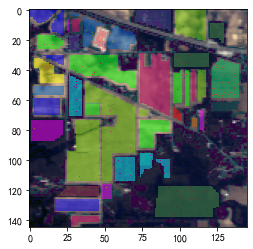

In [142]:
view = spectral.imshow(show_x, (30, 20, 10), classes=show_y)
view.set_display_mode('overlay')
view.class_alpha = 0.5